In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

## Multiplicative decomposition: australian retail turnover by category and state

/var/folders/nv/39qr5nt95_7gnlqhcjt63w3c0000gn/T/ipykernel_67203/2787912770.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


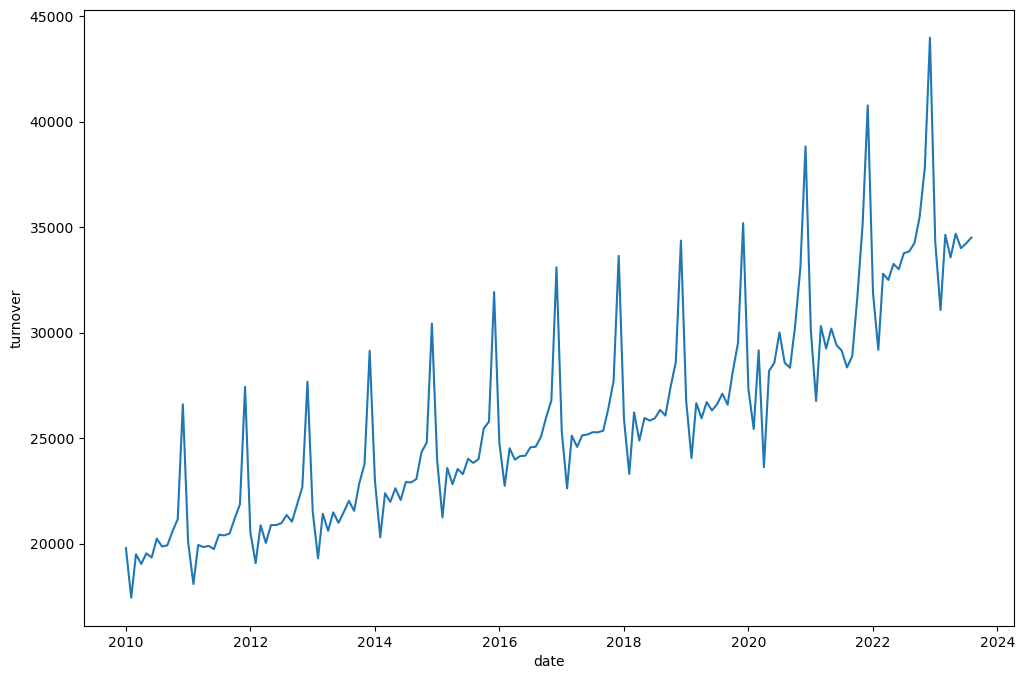

In [359]:
## url = 'https://www.abs.gov.au/statistics/industry/retail-and-wholesale-trade/retail-trade-australia/aug-2023/8501011.xlsx'

df = pd.read_csv('data/aus_retail_sales.csv', sep=';')
df = df.rename(columns={'Date': 'date'})

# Reshape from wide to long
df = pd.melt(df, id_vars='date', var_name='state_categ', value_name='turnover')
df[['remove', 'state', 'industry']] = df['state_categ'].str.rstrip(';').str.split(' ;', expand=True)

# Clean colnames
df = df.drop(columns=['state_categ', 'remove'])
df['industry'] = df['industry'].str.strip()
df['state'] = df['state'].str.strip()

# Parse colunns
df['date'] = pd.to_datetime(df['date'])
df['turnover'] = pd.to_numeric(df['turnover'].str.replace(',', '.'))

# Extract the data
mask = (df['industry'] == 'Total (Industry)') & (df['state'] == 'Total (State)') &  (df['date'] >= '2010-01-01')
data = df.loc[mask, ['date', 'turnover']]

plt.figure(figsize=(12, 8))
sns.lineplot(data, x='date', y='turnover')
plt.savefig('multiplicative_timeserie.png')

### Decompose with statsmodel

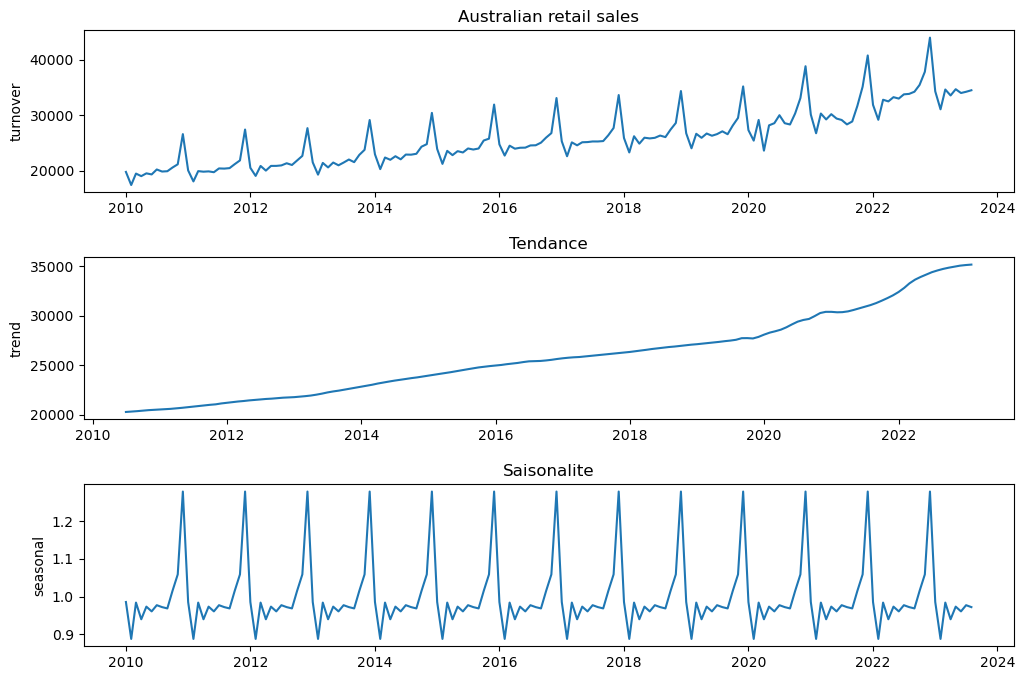

In [360]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Decomposition using statsmodel
mult_decompose = seasonal_decompose(x=data['turnover'], model='multiplicative', period=12)

# Display the original time serie
sns.lineplot(data, x='date', y='turnover', ax=axs[0])
axs[0].set_title('Australian retail sales')
axs[0].set_xlabel('')

# Display the trend
sns.lineplot(y=mult_decompose.trend, x=data['date'], ax=axs[1])
axs[1].set_title('Tendance')
axs[1].set_xlabel('')

# Display the seasonal effect
sns.lineplot(y=mult_decompose.seasonal, x=data['date'], ax=axs[2])
axs[2].set_title('Saisonalite')
axs[2].set_xlabel('')

plt.savefig('fig/mutiplicative_decomposition.png')

# # Change the default figsize
# rcParams['figure.figsize'] = 12, 8

# # Display the decomposition
# mult_decompose.plot()
# plt.show()

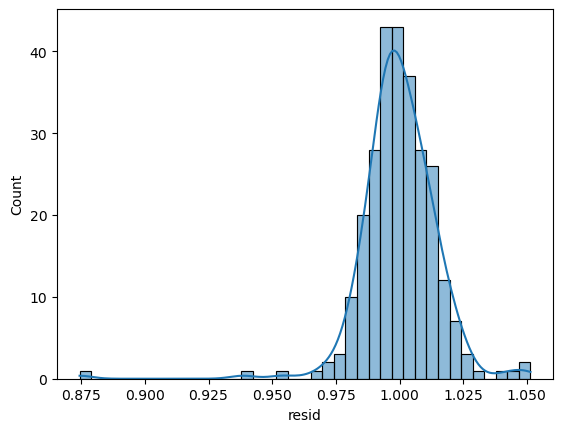

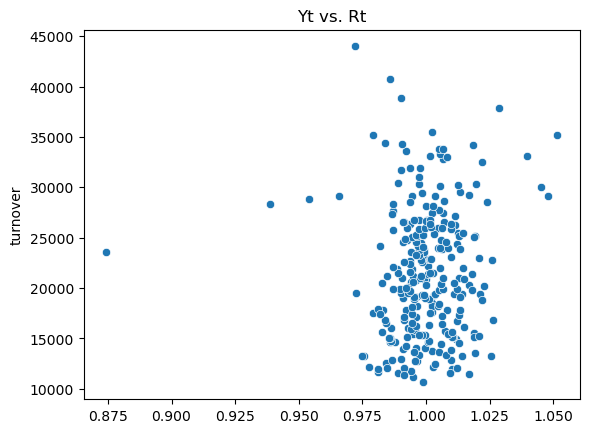

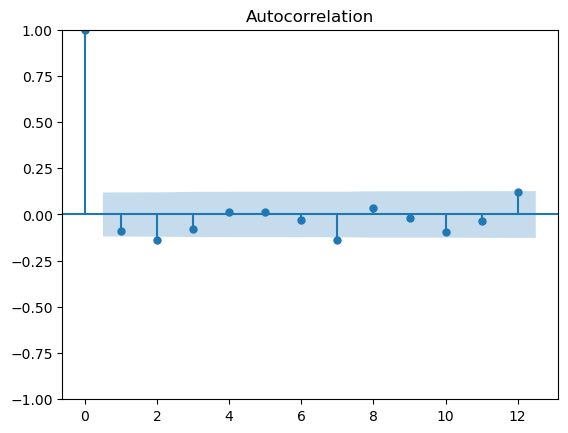

In [224]:
# Densite de probabilite des residus 
sns.histplot(mult_decompose.resid.dropna(), kde=True)
plt.show()

sns.scatterplot(x=mult_decompose.resid.values, y=data['turnover'])
plt.title('Yt vs. Rt')
plt.show()

# Plot ACF
plot_acf(mult_decompose.resid.dropna(), lags=12)
plt.show()

## Additive decomposition: u.s. retail trade employment

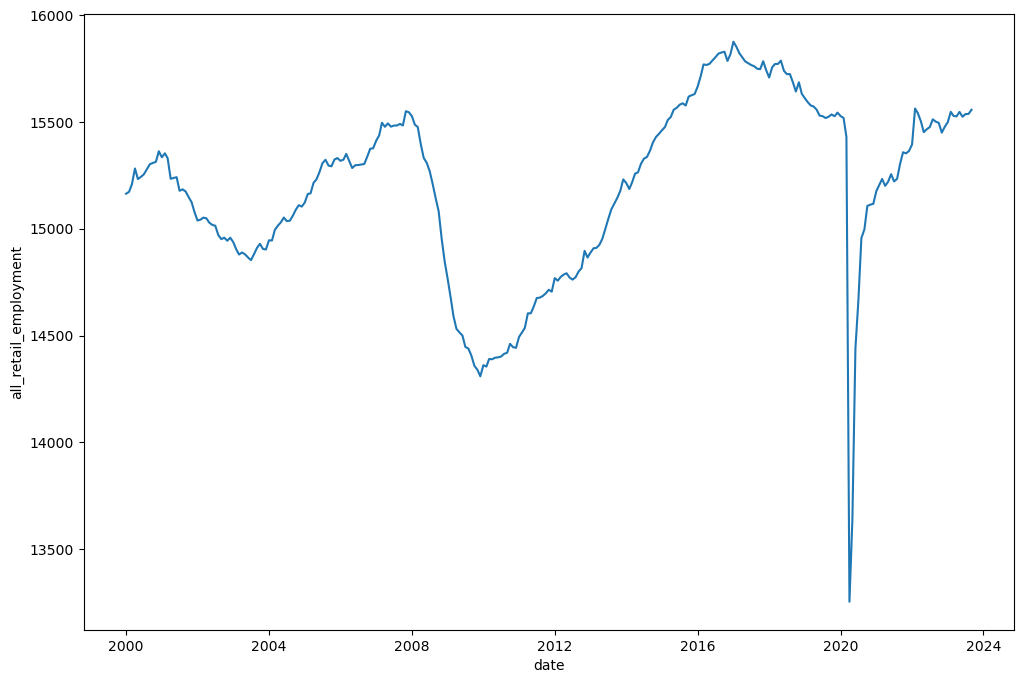

In [367]:
df = pd.read_csv('data/us_retail_emp.csv', sep=',')
df = df.reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])

# Extract the data
data = df.loc[df['date'] >= '2000-01-01']

plt.figure(figsize=(12, 8))
sns.lineplot(data, x='date', y='all_retail_employment')
plt.savefig('fig/additive_timeserie.png')

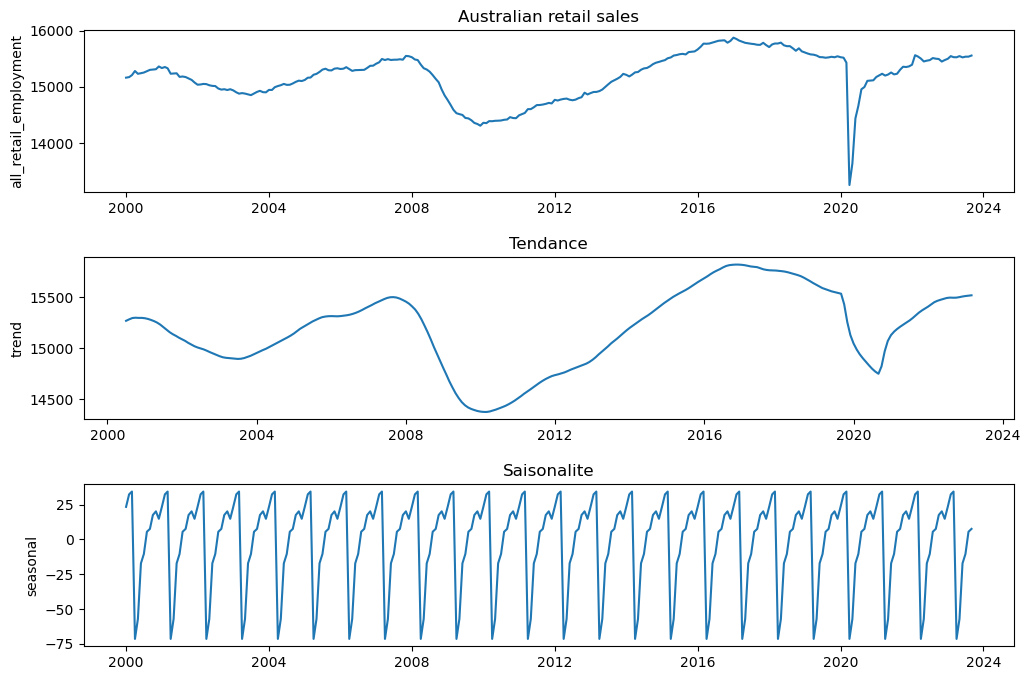

<Figure size 1200x800 with 0 Axes>

In [368]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Decompose with statmodel
add_decompose = seasonal_decompose(data['all_retail_employment'], model='additive', period=12)

# Display the original time serie
sns.lineplot(data, x='date', y='all_retail_employment', ax=axs[0])
axs[0].set_title('Australian retail sales')
axs[0].set_xlabel('')

# Display the trend
sns.lineplot(y=add_decompose.trend, x=data['date'], ax=axs[1])
axs[1].set_title('Tendance')
axs[1].set_xlabel('')

# Display the seasonal effect
sns.lineplot(y=add_decompose.seasonal, x=data['date'], ax=axs[2])
axs[2].set_title('Saisonalite')
axs[2].set_xlabel('')

plt.show()
plt.savefig('fig/additive_decomposition.png')

